In [18]:
data_folder = "/kaggle/input/ss-21-team-lab-artist-classification"

# Preprocessing the data
Since every song is saved as a oneline, made out of 'NEWLINE' to indicate a new line

In [19]:
train_file = data_folder + "/songs_train.txt"
lines = []
with open(train_file, 'r') as f:
    for line in f.readlines():
        # The three values for each line are joined together with the tab '\t' character
        artist, title, lyrics = line.split('\t')
        
        # The lyrics are joined with a ' NEWLINE ' substring
        lyrics_list = lyrics.split(' NEWLINE ')
        # Since the cleanup doesn't work for the last line, we need to do this
        lyrics_list[-1] = lyrics_list[-1].replace(' NEWLINE\n', '')

        lines.append([artist, title, lyrics_list])

In [20]:
import pandas as pd
data = pd.DataFrame(lines, columns=['artist', 'title', 'lyrics'])

# Information about our data
## Number of songs

In [21]:
data

,artist,title,lyrics
0,Great Big Sea,Wave Over Wave,"[Only name Table Rogers a share man am I, On a..."
1,Everlast,What Is This,"[(What is it?), (This is everlasting), Step up..."
2,Children,All The Pretty Little Ponies,"[Hush a bye, Don't you cry, Go to sleep my lit..."
3,Rush,Moving To Bohemia,"[Where the air's not clean, Where the water's ..."
4,Chris Rea,God's Great Banana Skin,[Go down my road running just as fast as I can...
...,...,...,...
46115,Billy Joel,Billy The Kid,"[From a town known as Wheeling, West Virginia,..."
46116,Green Day,Restless Heart Syndrome,"[I've got a really bad disease, It's got me be..."
46117,Lynyrd Skynyrd,Searchin',"[I asked the wise man one sunny day, Can you h..."
46118,Kenny Chesney,Soul Of A Sailor,"[He walked in with a salty sway, Lookin' like ..."


## Numer of songs per artist
This also prints out the number of unique artists.

In [22]:
songs_per_artist = data.artist.sort_values().value_counts()
songs_per_artist

America          159
Cliff Richard    157
Bob Dylan        154
George Strait    153
Reba Mcentire    152
                ... 
Exo                2
Zed                1
Zoe                1
Ungu               1
X-Treme            1
Name: artist, Length: 642, dtype: int64

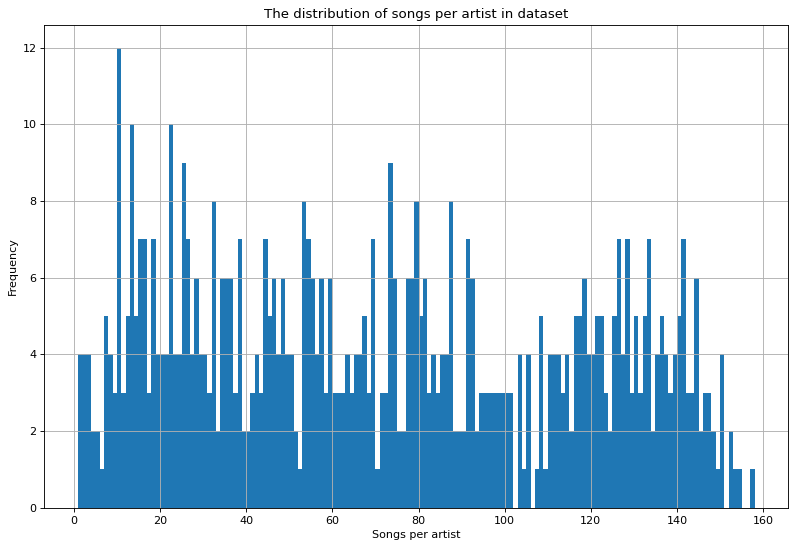

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

values = songs_per_artist.values
n, bins, patches = plt.hist(values, bins=range(min(values), max(values)))

plt.xlabel('Songs per artist')
plt.ylabel('Frequency')
plt.title('The distribution of songs per artist in dataset')
plt.grid(True)
plt.show()

## Min, max, mean line length
This is without any preprocessing, like lemmization or stemming. 

In [24]:
# Using spacy for tokenization
import spacy
nlp = spacy.load("en_core_web_sm")

# Funky loop, but basically what it does is first reads a song lyrics from 'data.lyrics'
# and then tokenizes each line using SpaCy's Tokenizer 'nlp'.
all_lyric_tokens = []
for i, lyrics in enumerate(data.lyrics):
    for line in lyrics:
        all_lyric_tokens.append(nlp(line.lower()))
    
    if i > 5000:
        break

In [25]:
import statistics

all_line_lengths = [len(line) for line in all_lyric_tokens]
print('Min:', min(all_line_lengths))
print('Max:', max(all_line_lengths))
print('Mean:', statistics.mean(all_line_lengths))

Min: 1
Max: 33
Mean: 7.214616155124397


## Number of lines in corpus

In [26]:
len(all_lyric_tokens)

172713

## Vocabulary size

In [27]:
from collections import Counter

vocabulary = Counter([token.text for line in all_lyric_tokens for token in line if not token.is_punct])
print('Vocabulary size:', len(vocabulary))
vocabulary.most_common()[:50]

Vocabulary size: 24005


[('i', 51641),
 ('the', 43343),
 ('you', 41494),
 ('and', 25479),
 ('to', 25254),
 ('a', 22144),
 ('it', 18293),
 ('me', 17701),
 ("'s", 16341),
 ("n't", 15355),
 ('my', 14869),
 ('in', 14472),
 ('that', 11710),
 ('of', 11695),
 ('do', 11667),
 ('your', 10005),
 ('on', 9805),
 ("'m", 9079),
 ('we', 8953),
 ('all', 8844),
 ('is', 8506),
 ('for', 8147),
 ('be', 7804),
 ('love', 7734),
 ('but', 6519),
 ('so', 6453),
 ('know', 6291),
 ('just', 5784),
 ('with', 5670),
 ('like', 5492),
 ('what', 5376),
 ('no', 5356),
 ('got', 5347),
 ("'re", 5300),
 ('oh', 5203),
 ('when', 5163),
 ("'ll", 4935),
 ('this', 4751),
 ('can', 4733),
 ('now', 4638),
 ('up', 4510),
 ('he', 4470),
 ('they', 4282),
 ('there', 4281),
 ('she', 4218),
 ('down', 4077),
 ('was', 4052),
 ('if', 4029),
 ("'ve", 3990),
 ('one', 3928)]

## Amount of non-English words
If any charachter is found in the lyrics that isn't ASCII, it's considered non-English. Not the best solution, but works for this.

In [28]:
non_english_tokens = [token for line in all_lyric_tokens for token in line if not token.is_ascii]
num_all_tokens = sum([len(line) for line in all_lyric_tokens])

print("Number of all tokens in corpus:", num_all_tokens)
print("Number of non-English tokens in corpus:", len(non_english_tokens))
print("% of non-English tokens in corpus:", 100 * len(non_english_tokens) / num_all_tokens, "%")
non_english_tokens[:100]

Number of all tokens in corpus: 1246058
Number of non-English tokens in corpus: 0
% of non-English tokens in corpus: 0.0 %


[]